### Supervised Classification Techniques including Ensemble Learning

Titanic dataset for predicting the survival of passengers
Attributes:
    'PassengerId'
    'Survived'
    'Pclass'
    'Name'
    'Sex'
    'Age'
    'SibSp'
    'Parch'
    'Ticket'
    'Fare'
    'Cabin'
    'Embarked
    

In [164]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from mlxtend.classifier import StackingClassifier
from mlxtend.plotting import plot_learning_curves
from sklearn import svm

import scipy.stats
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [203]:
df2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df2=pd.read_csv("C:\GL\csv_files\\train (1).csv")

In [5]:
df_train=pd.read_csv("C:\GL\csv_files\\train (1).csv")
df_test=pd.read_csv("C:\GL\csv_files\\test (1).csv")


In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train["From"]="Train"
df_test["Survived"]=np.nan
df_test["From"]="Test"

In [8]:
df=pd.concat([df_train,df_test],axis=0,ignore_index=True)

In [9]:
df.From.value_counts()

Train    891
Test     418
Name: From, dtype: int64

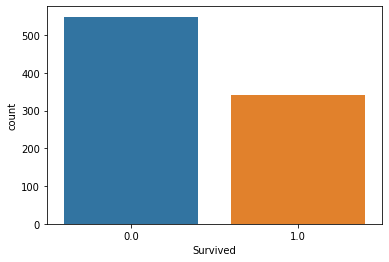

In [26]:
sns.countplot(df.Survived)
plt.show()

In [10]:
df.shape

(1309, 13)

In [11]:
df_train.shape

(891, 13)

In [12]:
df_test.shape

(418, 13)

### Checking for null values

In [13]:

df.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
From              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [16]:
#percentage missing values
(df.isnull().sum()/1309)*100

Age             0.000000
Cabin          77.463713
Embarked        0.152788
Fare            0.076394
From            0.000000
Name            0.000000
Parch           0.000000
PassengerId     0.000000
Pclass          0.000000
Sex             0.000000
SibSp           0.000000
Survived       31.932773
Ticket          0.000000
dtype: float64

In [18]:
#imputing age column with median
df.Age.fillna(df.Age.median(),inplace=True)

In [20]:
#Embarked with mode of the category
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)
df.Fare.fillna(df.Fare.mean(),inplace=True)

In [21]:
#Dropping irrelevant columns
df.drop(["Cabin","PassengerId","Name","Ticket"],axis=1,inplace=True)

In [22]:
df.columns

Index(['Age', 'Embarked', 'Fare', 'From', 'Parch', 'Pclass', 'Sex', 'SibSp',
       'Survived'],
      dtype='object')

In [24]:
df.dtypes

Age         float64
Embarked     object
Fare        float64
From         object
Parch         int64
Pclass        int64
Sex          object
SibSp         int64
Survived    float64
dtype: object

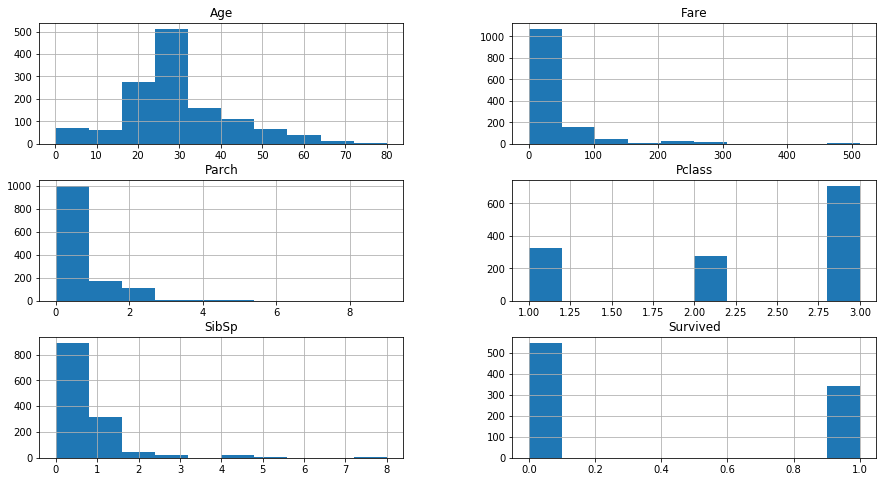

In [29]:
df.hist(figsize=(15,8))
plt.show()

In [30]:
#Converting categorical to numerical
df=pd.get_dummies(df,drop_first=True)

In [31]:
df.head()

,Age,Fare,Parch,Pclass,SibSp,Survived,Embarked_Q,Embarked_S,From_Train,Sex_male
0,22.0,7.2500,0,3,1,0.0,0,1,1,1
1,38.0,71.2833,0,1,1,1.0,0,0,1,0
2,26.0,7.9250,0,3,0,1.0,0,1,1,0
3,35.0,53.1000,0,1,1,1.0,0,1,1,0
4,35.0,8.0500,0,3,0,0.0,0,1,1,1


In [32]:
df_train=df[df["From_Train"]==1]
df_test=df[df["From_Train"] ==0]


In [33]:
df_train.drop("From_Train",axis=1,inplace=True)
df_test.drop(["From_Train","Survived"],axis=1,inplace=True)

In [34]:
X=df_train.drop("Survived",axis=1)
y=df_train["Survived"].astype(int)


In [138]:
#Splitiing into training and validation


In [35]:
df_train.shape


(891, 9)

In [37]:
#Sclaing using Min max scaler
m=MinMaxScaler()
X_norm=m.fit_transform(X)
df_test_norm=m.fit_transform(df_test)


In [93]:
#SPlitting into train and validation
X_train,X_test,y_train,y_test=train_test_split(X_norm,y,test_size=0.2,random_state=1)

### Model building

Supervised models we are going to build:
 
    1.Logistic regression
    2.KNN 
    3.Naive bayes
    4.Random Forest
    5.AdaBoost
    6.Gradient Bossting
    7.XGBoost

In [94]:
#Logistic regression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
y_pred_log=lr.predict(X_test)

In [96]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       106
           1       0.77      0.68      0.72        73

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



In [97]:
score=[]
score.append(accuracy_score(y_test,y_pred_log))

In [98]:
print("Accuracy :",accuracy_score(y_test,y_pred_log))

Accuracy : 0.7877094972067039


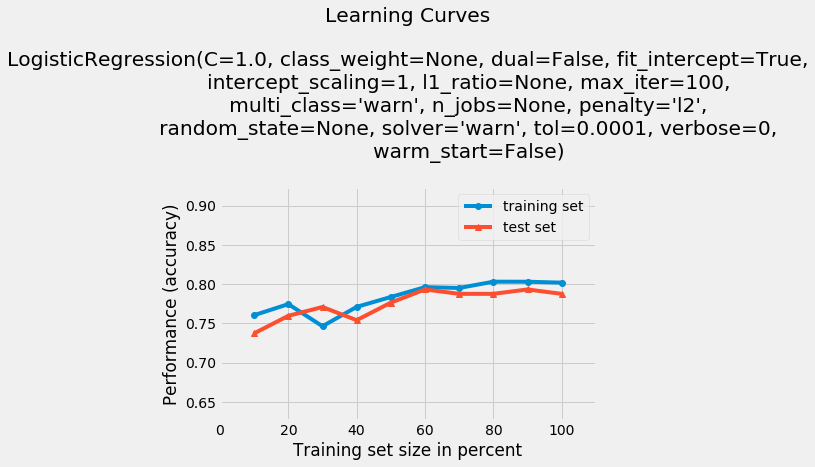

In [99]:
plot_learning_curves(X_train,y_train,X_test,y_test,clf=lr,scoring="accuracy")
plt.show()

### KNN

In [118]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

In [119]:
print("Accuracy :",accuracy_score(y_test,y_pred_knn))

Accuracy : 0.7821229050279329


In [120]:
score.append(accuracy_score(y_test,y_pred_knn))

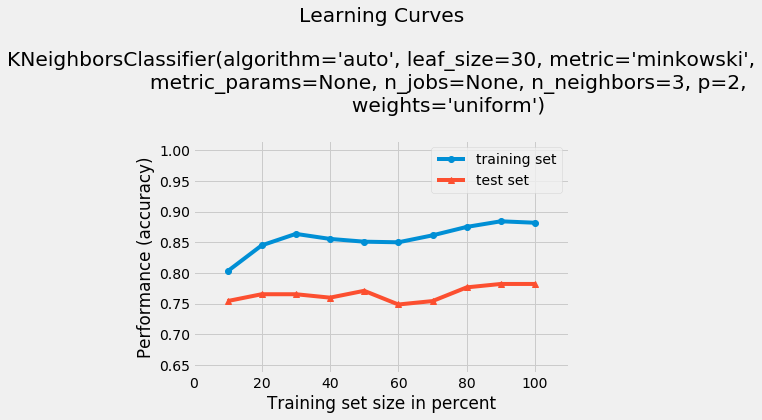

In [122]:
plot_learning_curves(X_train,y_train,X_test,y_test,clf=knn,scoring="accuracy",)
plt.show()

KNN model tends to overfit

#### Random forest classifier

In [137]:
rf=RandomForestClassifier(random_state=42)

Hyper parameter tuning using grid search cv

In [138]:
#Max Depth
params={"max_depth":range(1,10),"n_estimators":range(100,500,50),"criterion":["gini","entropy"]}
n_folds=10

forest=GridSearchCV(rf,param_grid=params,cv=n_folds,scoring="accuracy",return_train_score=True)
forest.fit(X_train,y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={

In [144]:
rf_best=forest.best_estimator_

In [145]:
print("Accuracy:",forest.best_score_)

Accuracy: 0.8469101123595506


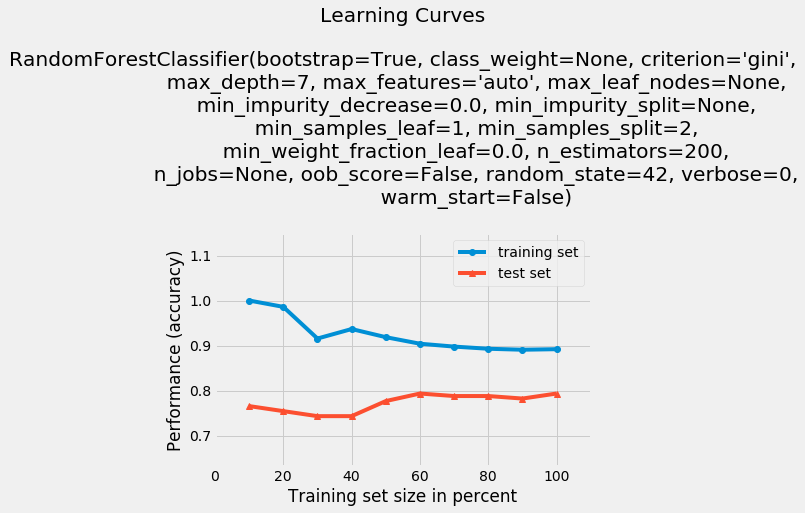

In [146]:

plot_learning_curves(X_train,y_train,X_test,y_test,clf=rf_best,scoring="accuracy",)
plt.show()

In [148]:
score.append(forest.best_score_)

In [149]:
score

[0.7877094972067039, 0.7821229050279329, 0.8469101123595506]

### AdaBoost

Builds sequential model and keeps on adjusting the weights of thw misclassified labels

In [152]:
ad=AdaBoostClassifier()
params={"learning_rate":np.linspace(0.1,1,20),"n_estimators":range(100,500,50)}
n_folds=10

ada=GridSearchCV(ad,param_grid=params,cv=n_folds,scoring="accuracy",return_train_score=True,verbose=1)
ada.fit(X_train,y_train)


Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:  8.7min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': array([0.1       , 0.14736842, 0.19473684, 0.24210526, 0.28947368,
       0.33684211, 0.38421053, 0.43157895, 0.47894737, 0.52631579,
       0.57368421, 0.62105263, 0.66842105, 0.71578947, 0.76315789,
       0.81052632, 0.85789474, 0.90526316, 0.95263158, 1.        ]),
                         'n_estimators': range(100, 500, 50)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [155]:
ada.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                   learning_rate=0.6210526315789474, n_estimators=250,
                   random_state=None)

In [171]:
adb_best=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                   learning_rate=0.6210526315789474, n_estimators=250,
                   random_state=1)

In [156]:
score.append(ada.best_score_)

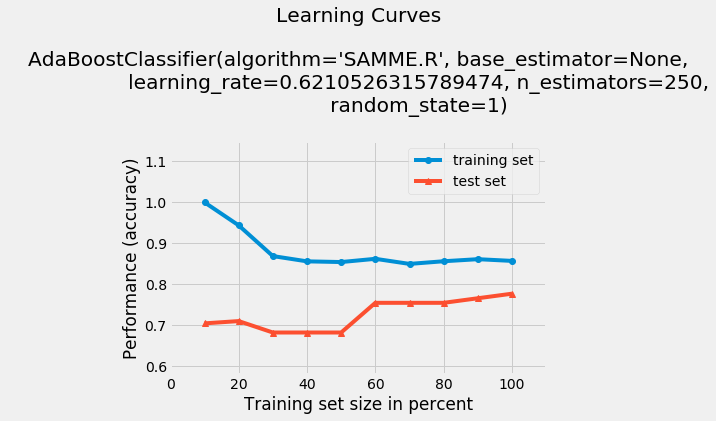

In [172]:

plot_learning_curves(X_train,y_train,X_test,y_test,clf=adb_best,scoring="accuracy",)
plt.show()

In [173]:
print("Lesser overfitting and test accuracy can be improved with increase in training data")

Lesser overfitting and test accuracy can be improved with increase in training data


### XGBoost

In [176]:
xgb=XGBClassifier(random_state=1)
params={"learning_rate":np.linspace(0.1,1,10),"max_depth":range(1,10)}
n_folds=10

ada=GridSearchCV(xgb,param_grid=params,cv=n_folds,scoring="accuracy",return_train_score=True,verbose=1)
ada.fit(X_train,y_train)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:   41.6s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constra...
                                     random_state=1, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     ver

In [178]:
xgb_best=ada.best_estimator_

In [179]:
print("Accuracy :",ada.best_score_)

Accuracy : 0.8370786516853933


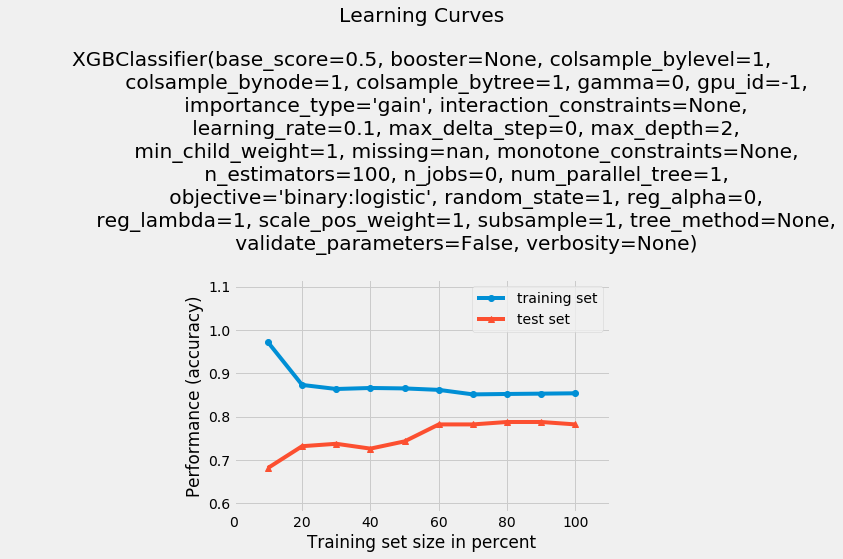

In [181]:
plot_learning_curves(X_train,y_train,X_test,y_test,clf=xgb_best,scoring="accuracy",)
plt.show()

In [182]:
print("Least overfitting of all")

Least overfitting of all


In [183]:
score.append(ada.best_score_)

In [184]:
score

[0.7877094972067039,
 0.7821229050279329,
 0.8469101123595506,
 0.8188202247191011,
 0.8370786516853933]

In [185]:
clf=["Logistic","KNN","Random Forest","AdaBoost","XGBoosT"]

In [194]:
scores=pd.DataFrame(score,index=clf,columns=["Accuracy"])

In [195]:
print(scores)

               Accuracy
Logistic       0.787709
KNN            0.782123
Random Forest  0.846910
AdaBoost       0.818820
XGBoosT        0.837079


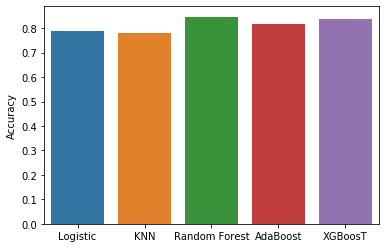

In [201]:
sns.barplot(x=scores.index,y=scores["Accuracy"])
plt.show()

### Conclusion:
    Best performing models were XGBoost and Random Forest with accuracies of around 84%
    Performance can be improved by having more training data